#Importing all the Libraries

In [1]:
import pandas as pd
#%% Import libraries
import os, sys
import numpy as np
import pandas as pd # pandas.__version__
import matplotlib.pyplot as plt
import networkx as nx

#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)
#Set PANDAS to show all rows in DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('precision', 2)


#Helper Function to View different layouts

In [2]:
def show_graph(G, layout = 'circular_layout', file_name_to_save = None, node = None, depth_limit = None, title = '', b_save_only = False):

    try:
        if node != None:
            G = nx.bfs_tree(G, node, depth_limit = depth_limit)

        #Default
        edgelist = G.edges(); width = 1
        node_size = 200; node_color = 'lightblue'

        #Update default with values, if required
        if nx.is_weighted(G):
            print('Using weight as line width')
            edge_weight = nx.get_edge_attributes(G,'weight')
            edgelist = list(edge_weight.keys()) # Take fresh list as sequence is changed
            width = list(edge_weight.values())
            del(edge_weight)

        #if degree is present then use that to size the node
        if 'node_size' in G.nodes[list(G.nodes())[0]]:
            node_size = []
            for node in G.nodes():
                node_size.append(G.nodes[node]['node_size'])
        #end of if 'degree'

        if 'color' in G.nodes[list(G.nodes())[0]]:
            node_color = []
            for node in G.nodes():
                node_color.append(G.nodes[node]['color'])
        #end of if 'color'

    #    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > 5]

        # positions for all nodes based on layout. Few are 'pass' because those are throwing error as they need few extra inputs
        pos = nx.circular_layout(G) # Default

        if layout == 'bipartite_layout': # Position nodes in two straight lines.
            #pos = nx.bipartite_layout(G)
            pass
        elif layout == 'circular_layout': # Position nodes on a circle.
            pos = nx.circular_layout(G)
        elif layout == 'kamada_kawai_layout': # Position nodes using Kamada-Kawai path-length cost-function.
            pos = nx.kamada_kawai_layout(G)
        elif layout == 'planar_layout': # Position nodes without edge intersections.
            pos = nx.planar_layout(G)
        elif layout == 'random_layout': # Position nodes uniformly at random in the unit square.
            pos = nx.random_layout(G)
        elif layout == 'rescale_layout': # Returns scaled position array to (-scale, scale) in all axes.
            #pos = nx.rescale_layout(G)
            pass
        elif layout == 'shell_layout': # Position nodes in concentric circles.
            pos = nx.shell_layout(G)
        elif layout == 'spring_layout': # Position nodes using Fruchterman-Reingold force-directed algorithm.
            pos = nx.spring_layout(G)
        elif layout == 'spectral_layout': # Position nodes using the eigenvectors of the graph Laplacian.
            pos = nx.spectral_layout(G)
        elif layout == 'spiral_layout': # Position nodes in a spiral layout.
            #pos = nx.spiral_layout(G)
            pass


        plt.figure(figsize=(10,10))
        # nodes
        nx.draw_networkx_nodes(G, pos, node_size = node_size, node_color = node_color)

        # edges
        nx.draw_networkx_edges(G, pos, edgelist = edgelist, width = width, edge_color='grey', alpha=0.5)#  style='dashed'

        # labels
        nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

        plt.axis('off')
        plt.title(title)
        if file_name_to_save != None:
            print('Image is saved to ', file_name_to_save)
            plt.savefig(file_name_to_save)
        if b_save_only:
            plt.close()
        else:
            plt.show()
    except:
            print('%s%s' %("Unexpected error:", str(sys.exc_info()[0])))

    return
#end of show_graph


#Loading the dataset

In [3]:
#we used the dataset from https://www.kaggle.com/datasets/usdot/flight-delays?resource=download but trimmed it so we could compute all the grpah metrics fast, the file flights_trimmed.csv will be needed to run this notebook

train_edges=pd.read_csv("/content/drive/MyDrive/SNA- Flights/flights_trimmed.csv")

In [4]:
train_edges.head()

#we will only use origin airport and destination airport for our analysis but slightly advanced stuff can be done using airtime and distance

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE
0,anc,sea,169.0,1448
1,lax,pbi,263.0,2330
2,sfo,clt,266.0,2296
3,lax,mia,258.0,2342
4,sea,anc,199.0,1448


In [5]:
#creating graph from data frame
G= nx.from_pandas_edgelist(train_edges, source = 'ORIGIN_AIRPORT', target = 'DESTINATION_AIRPORT')


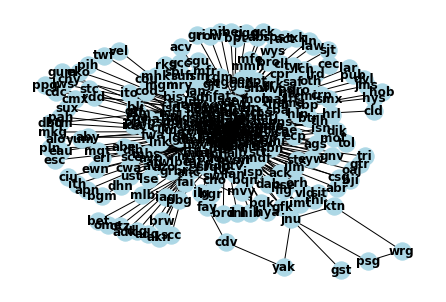

In [6]:
#Let us see the basic view
nx.draw(G, with_labels=True, font_weight='bold', node_color = 'lightblue')


In [7]:
# Get the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = nx.average_degree_connectivity(G)



print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree of the graph: {avg_degree}")

Number of nodes: 322
Number of edges: 2346
Average degree of the graph: {30: 73.35833333333333, 73: 45.21917808219178, 81: 41.04938271604938, 26: 68.07692307692308, 69: 43.28019323671498, 55: 53.0, 120: 30.6, 78: 44.65384615384615, 149: 25.503355704697988, 168: 24.333333333333332, 140: 27.82857142857143, 90: 35.05555555555556, 48: 59.625, 41: 68.65853658536585, 5: 116.91666666666667, 61: 49.75409836065574, 79: 43.30379746835443, 162: 24.38888888888889, 28: 65.17857142857143, 23: 82.87826086956522, 87: 40.08045977011494, 64: 44.953125, 2: 92.07291666666667, 74: 44.32432432432432, 4: 120.075, 62: 51.774193548387096, 25: 74.6, 10: 102.3625, 3: 107.57657657657657, 14: 84.42857142857143, 12: 89.39166666666667, 18: 85.3, 17: 76.1470588235294, 1: 119.34782608695652, 29: 79.32758620689656, 47: 61.836879432624116, 112: 32.285714285714285, 16: 91.265625, 11: 89.54545454545455, 7: 99.1038961038961, 71: 44.32394366197183, 9: 97.44444444444444, 27: 73.14814814814815, 42: 66.35714285714286, 67: 48.7

In [8]:
#density: ratio of actual edges in the network to all possible edges in the network. It gives sense of
#how closely knit your network is.
print('How closely knit network is ' + str(round(nx.density(G), 2))) #Not all are densely connected. It may be true because not all are busy

How closely knit network is 0.05


In [9]:
#Transitivity: the ratio of all triangles over all possible triangles. It expresses how 
#interconnected a graph is in terms of a ratio of actual over possible connections. 
#Transitivity allows you a way of thinking about all the relationships in your graph that may 
#exist but currently do not.
print('How interconnected network is ' + str(round(nx.transitivity(G), 2))) #Low, looks like not all are connetced in some path (say triangle)


How interconnected network is 0.34


In [10]:
#different layouts that networkx library provides
layouts = ['bipartite_layout', 'circular_layout', 'kamada_kawai_layout', 'planar_layout', 'random_layout', 'rescale_layout', 'shell_layout', 'spring_layout', 'spectral_layout', 'spiral_layout']


Image is saved to  /content/drive/MyDrive/SNA- Flights/imagesbipartite_layout.png


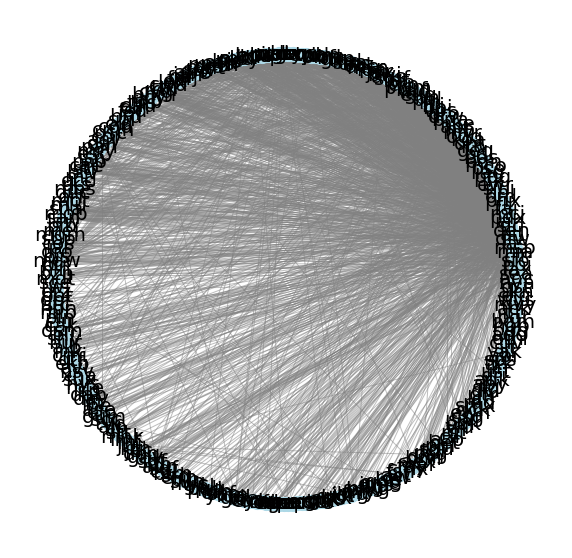

Image is saved to  /content/drive/MyDrive/SNA- Flights/imagescircular_layout.png


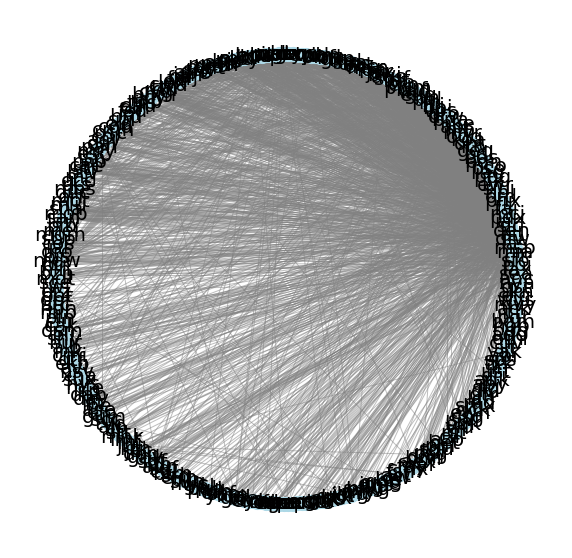

Image is saved to  /content/drive/MyDrive/SNA- Flights/imageskamada_kawai_layout.png


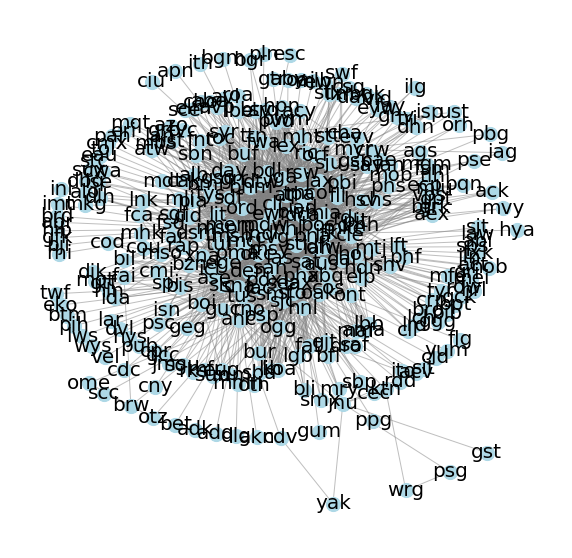

Unexpected error:<class 'networkx.exception.NetworkXException'>
Image is saved to  /content/drive/MyDrive/SNA- Flights/imagesrandom_layout.png


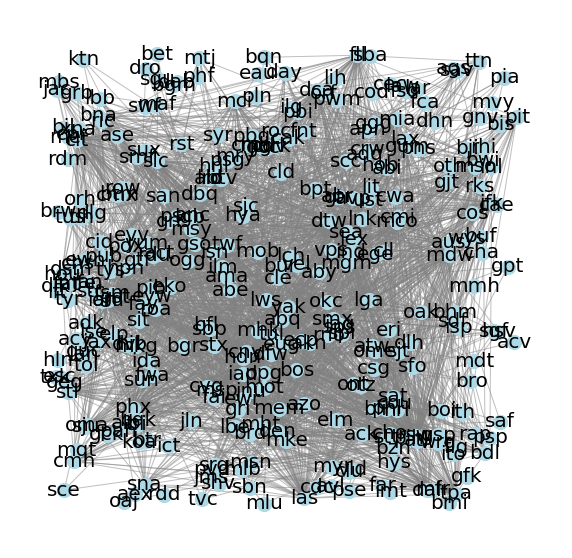

Image is saved to  /content/drive/MyDrive/SNA- Flights/imagesrescale_layout.png


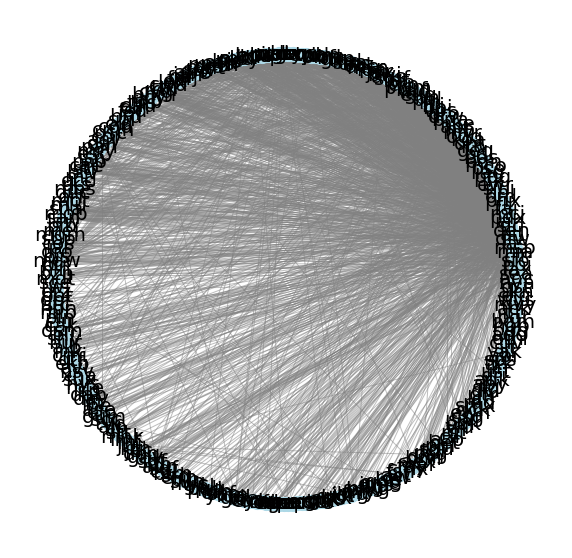

Image is saved to  /content/drive/MyDrive/SNA- Flights/imagesshell_layout.png


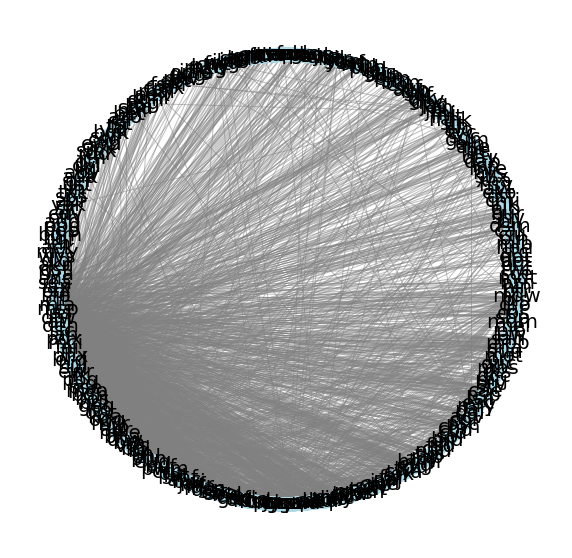

Image is saved to  /content/drive/MyDrive/SNA- Flights/imagesspring_layout.png


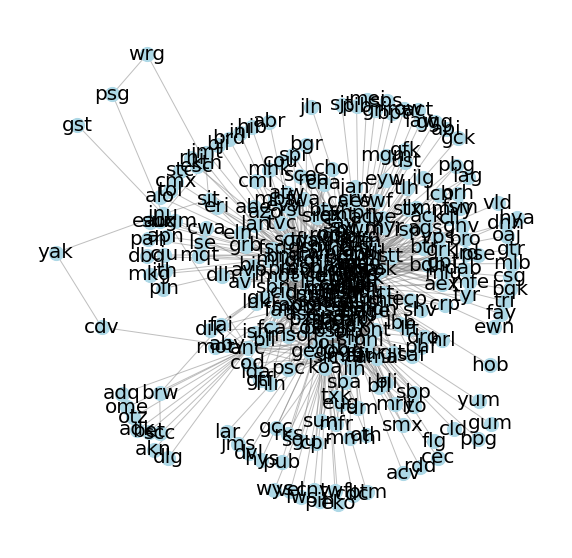

Image is saved to  /content/drive/MyDrive/SNA- Flights/imagesspectral_layout.png


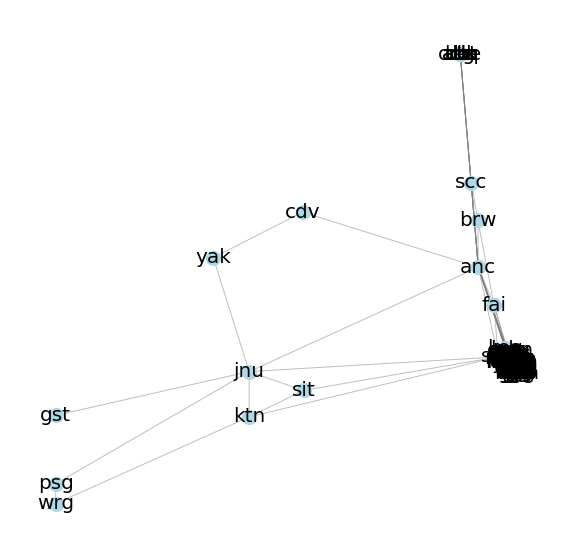

Image is saved to  /content/drive/MyDrive/SNA- Flights/imagesspiral_layout.png


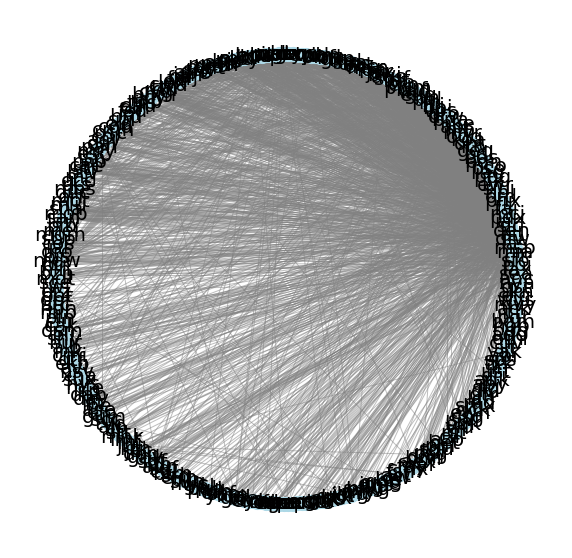

In [11]:
for layout in layouts:
    file_name_to_save = '/content/drive/MyDrive/SNA- Flights/images' + layout + '.png'
    show_graph(G, layout, file_name_to_save)

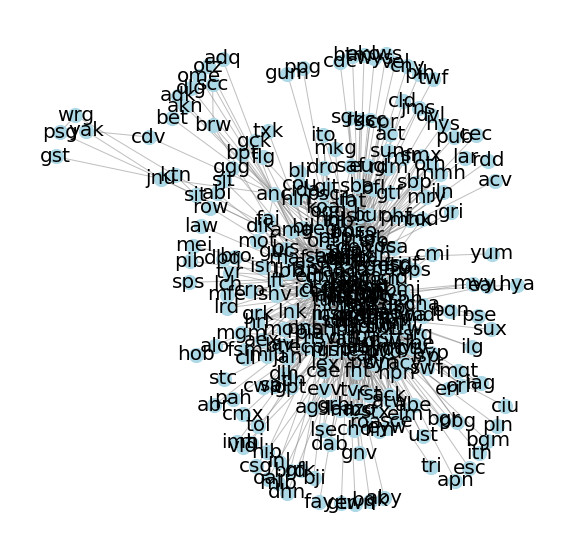

In [12]:
#Choose one of the layout which is more readable
show_graph(G, layout='spring_layout')

In [13]:

#diameter: the longest of all shortest paths. The measure is designed to give you a sense
# of the network’s overall size, the distance from one end of the network to another.
if nx.is_connected(G):
    print('Graph is connected')
    diameter = nx.diameter(G)
else:
    print('Graph is NOT connected hence using subgraph method')
    sub_graphs = nx.connected_components(G)
    max_component = max(sub_graphs, key=len)

    # Create a "subgraph" of just the largest component.  Then calculate the diameter of the subgraph
    diameter = nx.diameter(G.subgraph(max_component))

print(diameter) #4: Looks like in 2-3 stops, one can travel to any airport

Graph is connected
4


In [14]:
#shortest paths: find how to travel from one airport to other
shortest_path = nx.shortest_path(G, source="wrg", target="hya")
print(f"Path from the selected airports {shortest_path}")
print(f"The number of stops needed to travel: {len(shortest_path)-1}") # # Need to travel steps

Path from the selected airports ['wrg', 'ktn', 'sea', 'jfk', 'hya']
The number of stops needed to travel: 4


In [15]:

#Degree:  who is the most important nodes. A node’s degree is the sum of its edges.
dict_degree = dict(G.degree(G.nodes()))
dict_degree = {k: v for k, v in sorted(dict_degree.items(), key=lambda item: item[1], reverse=True)} # https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [16]:
#How to search big tree. Search or starting point
bfs_tree = nx.bfs_tree(G, 'gsp')
print("Edges of the BFS tree:")
for u, v in bfs_tree.edges():
    print(u, v)

Edges of the BFS tree:
gsp atl
gsp hou
gsp lga
gsp iah
gsp ewr
gsp dtw
gsp dfw
gsp mdw
gsp bwi
gsp iad
gsp ord
gsp dca
gsp mia
atl las
atl den
atl slc
atl vps
atl bna
atl mci
atl cid
atl sfo
atl jfk
atl atw
atl phx
atl pns
atl ric
atl lax
atl bos
atl okc
atl mem
atl tul
atl jan
atl oaj
atl ttn
atl bdl
atl rdu
atl pia
atl phl
atl cmh
atl mob
atl mgm
atl roc
atl mco
atl btr
atl mdt
atl san
atl msp
atl aus
atl cos
atl sea
atl tpa
atl sat
atl mlb
atl pit
atl abe
atl rsw
atl sna
atl fll
atl bhm
atl msy
atl avl
atl hsv
atl cak
atl clt
atl orf
atl dab
atl pbi
atl cle
atl mke
atl shv
atl stl
atl lit
atl cvg
atl ind
atl dal
atl gso
atl sdf
atl chs
atl cae
atl jax
atl sav
atl stt
atl sju
atl abq
atl bzn
atl cha
atl eyw
atl tlh
atl gnv
atl sgf
atl crw
atl roa
atl ags
atl srq
atl ict
atl ilm
atl ecp
atl sbn
atl msn
atl fnt
atl hpn
atl jac
atl lex
atl evv
atl xna
atl pvd
atl buf
atl mtj
atl ase
atl lft
atl oma
atl ege
atl hdn
atl myr
atl grk
atl fay
atl gpt
atl hnl
atl tus
atl elp
atl bmi
atl dhn
a

In [17]:
#How to search big tree. Search or starting point
dfs_tree = nx.dfs_tree(G, 'gsp')
print("Edges of the DFS tree:")
for u, v in dfs_tree.edges():
    print(u, v)

Edges of the DFS tree:
gsp atl
atl las
atl oaj
atl mlb
atl fay
atl dhn
atl tri
atl vld
atl bqk
atl csg
atl ewn
atl gtr
atl aby
las msp
msp sfo
msp hib
msp abr
msp bji
msp gfk
msp rhi
sfo clt
sfo acv
sfo cec
sfo rdd
clt lax
clt dab
lax pbi
lax cld
lax smx
pbi bos
bos sju
sju ewr
ewr bqn
bqn mco
mco pse
pse jfk
jfk buf
jfk mvy
jfk hya
buf ord
ord phx
ord cwa
ord eau
ord pah
ord stc
ord sux
ord alo
ord dbq
ord avl
ord mkg
ord lse
ord cmx
ord tol
phx mia
phx mry
phx sbp
phx yum
phx flg
mia sea
mia gnv
mia stx
sea anc
anc pdx
anc fai
anc otz
anc jnu
anc bet
anc adk
anc adq
anc dlg
anc akn
pdx den
den dfw
den sba
den mot
den lar
den hys
den dik
den pub
den jms
den mmh
den oth
dfw sat
dfw law
dfw bpt
dfw cmi
dfw fsd
dfw bis
dfw mei
dfw sgf
dfw ggg
dfw row
dfw act
dfw fsm
dfw mhk
dfw gck
dfw dro
dfw gri
dfw cou
dfw mgm
dfw jln
dfw spi
dfw saf
dfw txk
dfw sps
dfw tlh
dfw abi
dfw sjt
sat iah
iah mke
iah bro
iah vps
iah mlu
iah gpt
iah mfe
iah lft
iah shv
iah ase
iah jan
iah lrd
iah isn
iah bfl
i

In [18]:
#Closeness Centrality: Determine closeness to all other nodes. Used for importance
dict_closeness_centrality = nx.closeness_centrality(G)
dict_closeness_centrality = {k: round(v,2) for k, v in sorted(dict_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

In [19]:
#Eigenvector centrality: It looks at a combination of a node’s edges and the edges of that node’s neighbors. It cares if you
#are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one,
#the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other
#nodes quickly.  If you’ve used Google, then you’re already some what familiar with Eigenvector centrality. Their PageRank
#algorithm uses an extension of this formula to decide which webpages get to the top of its search results.
dict_eigenvector = nx.eigenvector_centrality(G)
dict_eigenvector = {k: round(v,2) for k, v in sorted(dict_eigenvector.items(), key=lambda item: item[1], reverse=True)}


In [20]:
#Betweenness centrality: It finds 'broker' who connects two clusters. It looks at all the shortest paths that pass through a
#particular node . It is fairly good at finding nodes that connect two otherwise disparate parts of a network. If you’re
#the only thing connecting two clusters, every communication between those clusters has to pass through you.
#it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves
#but because they stand between groups, giving the network connectivity and cohesion.
dict_betweenness_centrality = nx.betweenness_centrality(G)
dict_betweenness_centrality = {k: round(v,2) for k, v in sorted(dict_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

In [21]:
#Is network one big, happy family where everyone knows everyone else? OR there are few communities
communities = nx.algorithms.community.greedy_modularity_communities(G)

#Now let us add these community number as attributes
dict_modularity = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    print('Community ', i, ' has ', len(c),' members')
    for name in c: # Loop through each person in a community
        dict_modularity[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add community(also known as modularity) information like we did the other metrics
#add_node_attributes(G, dict_modularity, 'community')

Community  0  has  131  members
Community  1  has  94  members
Community  2  has  74  members
Community  3  has  23  members


In [22]:
nx.set_node_attributes(G,dict_modularity,"community")
nx.set_node_attributes(G,dict_betweenness_centrality,"Betweenness")
nx.set_node_attributes(G,dict_eigenvector,"Eigenvector")
nx.set_node_attributes(G,dict_closeness_centrality,"Closeness")
nx.set_node_attributes(G,dict_degree,"Degree")






In [23]:
airports=pd.DataFrame(dict(G.nodes(data=True))).transpose().reset_index().rename(columns={'index':'airport_code'})
airports.head()

,airport_code,community,Betweenness,Eigenvector,Closeness,Degree
0,anc,1.0,0.07,0.05,0.51,30.0
1,sea,1.0,0.04,0.14,0.56,73.0
2,lax,1.0,0.03,0.15,0.57,81.0
3,pbi,2.0,0.00,0.07,0.48,26.0
4,sfo,1.0,0.04,0.14,0.57,81.0


In [24]:
airports.sort_values('Degree', ascending=False).head()

,airport_code,community,Betweenness,Eigenvector,Closeness,Degree
10,atl,0.0,0.17,0.20,0.67,168.0
19,ord,0.0,0.15,0.20,0.66,162.0
9,dfw,0.0,0.17,0.18,0.65,149.0
11,den,3.0,0.12,0.19,0.63,140.0
13,iah,0.0,0.06,0.17,0.61,120.0


In [25]:
#triangles : It is very basic of cluster with 3 nodes. It compute the number of triangles
dict_triangles = nx.triangles(G)

#Sort and keep highest on top
dict_triangles = {k: round(v,2) for k, v in sorted(dict_triangles.items(), key=lambda item: item[1], reverse=True)}

In [26]:
#squares : It is very basic of cluster with 4 nodes. It is fraction of possible squares that exist at the node
dict_square = nx.square_clustering(G)

#Sort and keep highest on top
dict_square = {k: round(v,2) for k, v in sorted(dict_square.items(), key=lambda item: item[1], reverse=True)}
dict_square

{'ilg': 0.84,
 'smx': 0.68,
 'bro': 0.68,
 'tyr': 0.68,
 'mfe': 0.68,
 'lrd': 0.68,
 'cll': 0.68,
 'lch': 0.68,
 'mry': 0.65,
 'sbp': 0.65,
 'orh': 0.62,
 'abe': 0.61,
 'sce': 0.61,
 'elm': 0.61,
 'mvy': 0.61,
 'eri': 0.59,
 'mqt': 0.59,
 'vps': 0.58,
 'mlu': 0.58,
 'gpt': 0.58,
 'grk': 0.58,
 'aex': 0.58,
 'avp': 0.57,
 'jan': 0.57,
 'cwa': 0.57,
 'lse': 0.57,
 'avl': 0.57,
 'lan': 0.56,
 'atw': 0.56,
 'grb': 0.56,
 'mbs': 0.56,
 'azo': 0.56,
 'cha': 0.55,
 'evv': 0.55,
 'ack': 0.55,
 'sba': 0.54,
 'mgm': 0.54,
 'fsm': 0.54,
 'isp': 0.54,
 'shv': 0.54,
 'lft': 0.54,
 'rdm': 0.53,
 'guc': 0.53,
 'spi': 0.53,
 'cmi': 0.53,
 'mhk': 0.53,
 'cou': 0.53,
 'cpr': 0.53,
 'sgu': 0.53,
 'fwa': 0.52,
 'mot': 0.52,
 'dik': 0.52,
 'fsd': 0.52,
 'mfr': 0.51,
 'sun': 0.51,
 'roa': 0.51,
 'tvc': 0.51,
 'pia': 0.5,
 'mli': 0.5,
 'bis': 0.5,
 'mmh': 0.5,
 'oth': 0.5,
 'isn': 0.49,
 'ida': 0.49,
 'hln': 0.49,
 'gtf': 0.49,
 'bqn': 0.49,
 'cho': 0.49,
 'bgr': 0.49,
 'bfl': 0.49,
 'swf': 0.48,
 'psc': 0.4

In [27]:
#Clusters: It is the fraction of pairs of the node’s friends (that is connections) that are connected with each other.
dict_clustering = nx.clustering(G)

#Sort and keep highest on top
dict_clustering = {k: round(v,2) for k, v in sorted(dict_clustering.items(), key=lambda item: item[1], reverse=True)}

In [28]:
#adding all the above details as node attributes
nx.set_node_attributes(G,dict_triangles,"Triangles")
nx.set_node_attributes(G,dict_square,"Squares")
nx.set_node_attributes(G,dict_clustering,"Clustering")

In [29]:
airports=pd.DataFrame(dict(G.nodes(data=True))).transpose().reset_index().rename(columns={'index':'airport_code'})
airports.head()

,airport_code,community,Betweenness,Eigenvector,Closeness,Degree,Triangles,Squares,Clustering
0,anc,1.0,0.07,0.05,0.51,30.0,135.0,0.17,0.31
1,sea,1.0,0.04,0.14,0.56,73.0,1040.0,0.25,0.40
2,lax,1.0,0.03,0.15,0.57,81.0,1151.0,0.24,0.36
3,pbi,2.0,0.00,0.07,0.48,26.0,194.0,0.31,0.60
4,sfo,1.0,0.04,0.14,0.57,81.0,996.0,0.22,0.31


In [30]:
nx.average_clustering(G)

0.6554386892021817

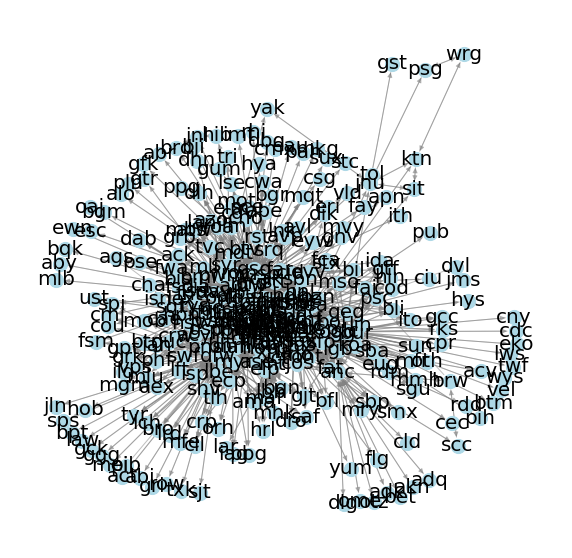

In [31]:

#get graph object from data frame
GD = nx.from_pandas_edgelist(train_edges, source = 'ORIGIN_AIRPORT', target = 'DESTINATION_AIRPORT',create_using=nx.DiGraph())

#Let us see the basic view
show_graph(GD, layout = 'spring_layout')

In [32]:
# Find the articulation nodes in the graph
articulation_nodes = list(nx.articulation_points(G))
print("Articulation nodes in the graph:", articulation_nodes)

# Find the bridge edges in the graph
bridge_edges = list(nx.bridges(G))
print("Bridge edges in the graph:", bridge_edges)

Articulation nodes in the graph: ['hnl', 'slc', 'dfw', 'dtw', 'iah', 'den', 'atl', 'phx', 'ord', 'jfk', 'lax', 'sfo', 'msp', 'jnu', 'anc']
Bridge edges in the graph: [('anc', 'bet'), ('anc', 'adk'), ('anc', 'adq'), ('anc', 'dlg'), ('anc', 'akn'), ('lax', 'cld'), ('sfo', 'acv'), ('sfo', 'cec'), ('sfo', 'rdd'), ('msp', 'abr'), ('msp', 'bji'), ('msp', 'gfk'), ('dfw', 'law'), ('dfw', 'bpt'), ('dfw', 'ggg'), ('dfw', 'row'), ('dfw', 'act'), ('dfw', 'gck'), ('dfw', 'gri'), ('dfw', 'jln'), ('dfw', 'txk'), ('dfw', 'sps'), ('dfw', 'abi'), ('dfw', 'sjt'), ('atl', 'oaj'), ('atl', 'mlb'), ('atl', 'fay'), ('atl', 'dhn'), ('atl', 'tri'), ('atl', 'vld'), ('atl', 'bqk'), ('atl', 'csg'), ('atl', 'ewn'), ('atl', 'gtr'), ('atl', 'aby'), ('den', 'lar'), ('den', 'hys'), ('den', 'pub'), ('slc', 'twf'), ('slc', 'eko'), ('slc', 'btm'), ('slc', 'pih'), ('slc', 'lws'), ('slc', 'vel'), ('slc', 'cdc'), ('slc', 'cny'), ('slc', 'wys'), ('iah', 'hob'), ('phx', 'yum'), ('phx', 'flg'), ('ord', 'eau'), ('ord', 'pah'), (